In [1]:
import numpy as np
import requests, gzip, os, hashlib
from matplotlib import pyplot as plt
import struct
%matplotlib inline

In [2]:
with open('train-images-idx3-ubyte','rb') as f:
    '''
    1st Byte = 0, 2nd Byte = 0, 3rd Byte = DataType, 4th Byte = Number of Dimenstions
    1st I (unsigned int, 4 Bytes) = Number of Images
    2nd I (unsigned int, 4 Bytes) = Number of Rows
    3rd I (unsigned int, 4 Bytes) = Number of Columns
    16 Bytes
    '''
    print(struct.unpack('>BBBBIII',f.read(16)))
    images=np.frombuffer(f.read(),dtype=np.uint8).reshape((-1, 28, 28))
    print(images.shape)
    print(images.flatten().shape)

(0, 0, 8, 3, 60000, 28, 28)
(60000, 28, 28)
(47040000,)


In [3]:
with open('train-labels-idx1-ubyte','rb') as f:
    '''
    1st Byte = 0, 2nd Byte = 0, 3rd Byte = DataType, 4th Byte = Number of Dimenstions
    1st I (unsigned int, 4 Bytes) = Number of Labels
    '''
    print(struct.unpack('>BBBBI',f.read(8)))
    labels=np.frombuffer(f.read(),dtype=np.uint8).reshape((-1, 1))
    print(labels.shape)

(0, 0, 8, 1, 60000)
(60000, 1)


In [4]:
indices,_=np.where((labels ==1) | (labels == 3) | (labels == 7))
images=images[indices].copy()
labels=labels[indices].copy()
print(images.shape)
print(labels.shape)

(19138, 28, 28)
(19138, 1)


In [5]:
images.reshape(-1,28*28).shape

(19138, 784)

In [6]:
def oneHotEncoder(x):
    uniques=np.unique(x) # get unique elements
    uniques.sort() #sort them
    uniques=uniques[::-1] #reverse array order
    one_hot_translation={} #create an empty dictionary with unique items as keys, and one hot translation as value
    for item in uniques:
        one_hot_translation[item]=np.zeros(uniques.shape,dtype=int)
        one_hot_translation[item][np.where(uniques==item)[0]]=1
    return one_hot_translation

In [7]:
one_hot_translation=oneHotEncoder(labels)
one_hot_labels=np.zeros((labels.shape[0],3),dtype=int)

In [8]:
for key in one_hot_translation.keys():
    one_hot_labels[np.where(labels==key)[0]]=one_hot_translation[key]
    

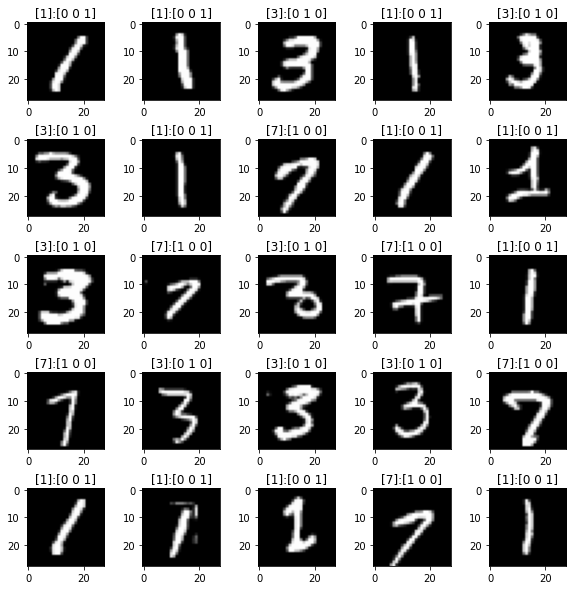

In [9]:
fig, axs = plt.subplots(nrows=5, ncols=5, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
for img in range(0,25):
    ax = plt.subplot(5,5,img + 1)
    ax.set_title(str(labels[img])+':'+str(one_hot_labels[img]))
    plt.imshow(images[img],cmap='gray')

In [11]:
x=images.reshape(-1,28*28)
np.random.seed(42)
w=np.random.uniform(-1.,1.,size=(784,3))

In [16]:
w

array([[-0.25091976,  0.90142861,  0.46398788],
       [ 0.19731697, -0.68796272, -0.68801096],
       [-0.88383278,  0.73235229,  0.20223002],
       ...,
       [-0.29045742,  0.88345142,  0.33714529],
       [ 0.35733991, -0.27616002,  0.18732158],
       [-0.97973763,  0.27219209,  0.8265739 ]])

In [ ]:
(19138*784).(784*3)+b=(19138*3)

In [ ]:
[0.001,0.0009,0.98]